# Neural Networks with Scikit
### MLPClassifier Classifier

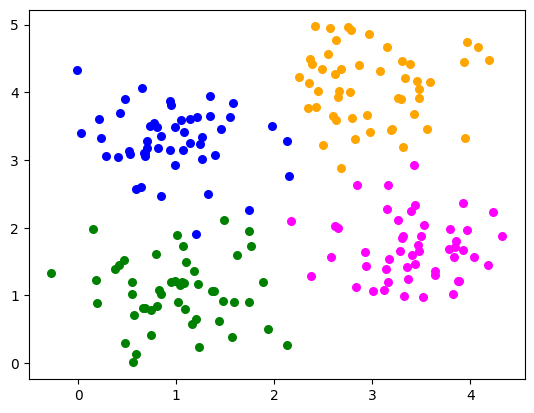

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])

data, labels = make_blobs(n_samples=n_samples, centers=blob_centers,
                          cluster_std=0.5, random_state=0)

colors = ('green', 'orange', 'blue', 'magenta')

fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], data[labels==n_class][:, 1],
                c=colors[n_class], s=30, label=str(n_class))

In [2]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                                                                    test_size=0.2)

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=1)

clf.fit(train_data, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_state=1,
              solver='lbfgs')

In [4]:
clf.score(train_data, train_labels)

1.0

In [5]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)

train_score = accuracy_score(predictions_train, train_labels)
print('score on train data: ', train_score)

test_score = accuracy_score(predictions_test, test_labels)
print('score on test data: ', test_score)

score on train data:  1.0
score on test data:  0.95


In [6]:
predictions_train[:20]

array([3, 1, 0, 0, 1, 3, 3, 0, 0, 1, 1, 1, 0, 0, 2, 3, 3, 2, 0, 1])

### Multi-Layer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


In [8]:
print('weights between input and first hidden layer:')
print(clf.coefs_[0])

print('\nweights between first hidden and second hidden layer:')
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


In [9]:
print('w0 = ', clf.coefs_[0][0][0])
print('w1 = ', clf.coefs_[0][1][0])

w0 =  -0.14203691267827165
w1 =  -0.6978111149778683


In [10]:
clf.coefs_[0][:, 0]

array([-0.14203691, -0.69781111])

In [11]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]

    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:, j]
        print(i, j, weights, end=', ')
        print()
    print()

0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 

1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 

2 0 [-4.96774269 -0.86330397], 



In [12]:
print('Bias values for first hidden layer:')
print(clf.intercepts_[0])

print('\nBias values for second hidden layer:')
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


In [13]:
result = clf.predict([[0, 0], [0, 1],
                      [1, 0], [0, 1],
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])

In [14]:
prob_results = clf.predict_proba([[0, 0], [0, 1],
                                  [1, 0], [0, 1],
                                  [1, 1], [2., 2.],
                                  [1.3, 1.3], [2, 4.8]])

print(prob_results)

[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


### Complete Iris Dataset Example

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(iris.data, iris.target,
                                                                    test_size=0.2)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[ 1.19200431 -0.12335177  0.99397743  1.20540576]
 [-1.20885243 -1.46900748 -0.26277564 -0.25838044]
 [-0.32432626 -0.57190368  0.65122659  1.07233429]]


In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))

predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.975
1.0


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions_train, train_labels)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]], dtype=int64)

In [21]:
confusion_matrix(predictions_test, test_labels)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
import numpy as np
import pickle

with open('pickled_mnist.pkl', 'br') as fh:
    data = pickle.load(fh)

train_imgs, test_imgs = data[0], data[1]
train_labels, test_labels = data[2], data[3]

no_of_different_labels = 10
lr = np.arange(no_of_different_labels)


train_labels_one_hot = (lr==train_labels).astype(np.float64)
test_labels_one_hot = (lr==test_labels).astype(np.float64)

image_size = 28
no_of_different_labels = 10
image_pixels = image_size * image_size

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=480,
                    alpha=1e-3, solver='sgd', verbose=10,
                    tol=1e-4, random_state=1,
                    learning_rate_init=0.1)

train_labels = train_labels.reshape(train_labels.shape[0],)
print(train_imgs.shape, train_labels.shape)

mlp.fit(train_imgs, train_labels)
print('Training set score: %f' % mlp.score(train_imgs, train_labels))
print('Test set score: %f' % mlp.score(test_imgs, test_labels))

(60000, 784) (60000,)
Iteration 1, loss = 0.29846429
Iteration 2, loss = 0.12448306
Iteration 3, loss = 0.08972347
Iteration 4, loss = 0.07223224
Iteration 5, loss = 0.06019573
Iteration 6, loss = 0.05020181
Iteration 7, loss = 0.04349129
Iteration 8, loss = 0.03675808
Iteration 9, loss = 0.03187636
Iteration 10, loss = 0.02836163
Iteration 11, loss = 0.02381220
Iteration 12, loss = 0.02009028
Iteration 13, loss = 0.01780101
Iteration 14, loss = 0.01565869
Iteration 15, loss = 0.01296255
Iteration 16, loss = 0.01204078
Iteration 17, loss = 0.01007387
Iteration 18, loss = 0.00912796
Iteration 19, loss = 0.00799345
Iteration 20, loss = 0.00719969
Iteration 21, loss = 0.00635555
Iteration 22, loss = 0.00606530
Iteration 23, loss = 0.00570099
Iteration 24, loss = 0.00541527
Iteration 25, loss = 0.00515240
Iteration 26, loss = 0.00489319
Iteration 27, loss = 0.00484386
Iteration 28, loss = 0.00463053
Iteration 29, loss = 0.00452159
Iteration 30, loss = 0.00437222
Iteration 31, loss = 0.0043

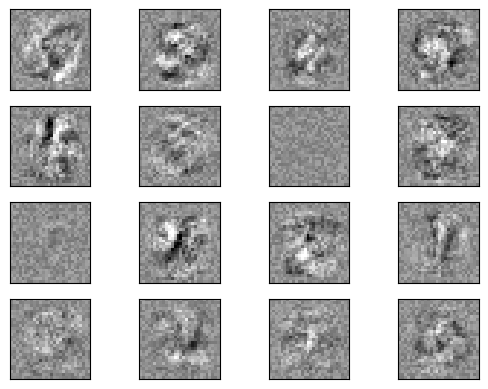

In [25]:
fig, axes = plt.subplots(4, 4)

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, 
               vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

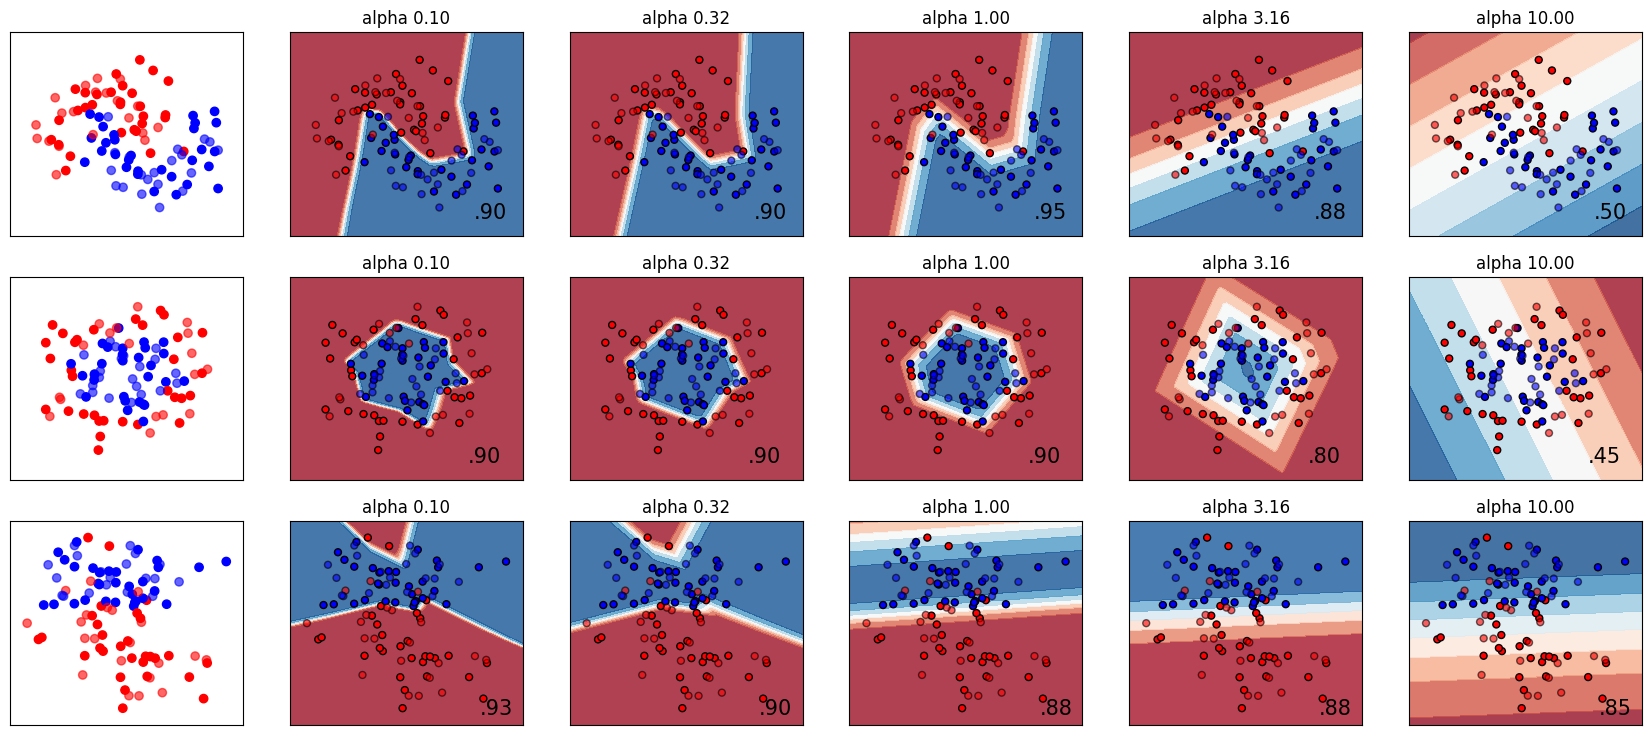

In [28]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.pipeline import make_pipeline

h = 0.02

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []

for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, 
            random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
            )
    ))
    names.append(f'alpha {alpha:.2f}')

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=0, n_clusters_per_class=1)

rng = np.random.RandomState(2)

X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                   cmap=cm_bright, edgecolors='black', s=25)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                   cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - 0.3, yy.min() + 0.3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()
